# <center>Brain Tumor Detection</center>

## Overview:
A brain tumor is an abnormal growth of cells in the brain, which can be either non-cancerous or cancerous. These tumors may originate within the brain or spread from other parts of the body. They can disrupt normal brain functions, leading to symptoms such as headaches, seizures, cognitive impairments, and motor deficits. Treatment options include surgery, radiation therapy, chemotherapy, or a combination, depending on the tumor type, location, and stage. Therefore Early detection is crucial for effective management.

Types of Brain Tumors We've taken for Detection:
* Pituatory Tumor
* Glioma Tumor
* Meningioma Tumor

## Dataset Information:

Brain MRI Dataset: [Kaggle - Brain Tumor Detection](https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset)

This dataset of size 164MB contains 7023 images of human brain MRI images which are classified into 4 classes: glioma, meningioma, no tumor and, pituitary.

### Training Data:

   * Glioma Tumor: 1321 Images
   * Meningioma Tumor: 1339 Images
   * No Tumor: 1595 Images
   * Pituitary Tumor: 1457 Images
   
### Testing Data:

   * Glioma Tumor: 300 Images
   * Meningioma Tumor: 306 Images
   * No Tumor: 405 Images
   * Pituitary Tumor: 300 Images

# 1. Importing required libraries
* ```Numpy```: A fundamental package for scientific computing in Python. It provides support for multidimensional arrays, along with a collection of mathematical functions to operate on these arrays efficiently. NumPy is widely used in numerical and scientific computing tasks, including data manipulation, linear algebra, statistics, and signal processing.

* ```Pandas```: A powerful library for data manipulation and analysis in Python. It offers data structures and functions for working with structured data, primarily in the form of dataframes. Dataframes are two-dimensional labeled arrays capable of holding heterogeneous data types. Pandas provides tools for reading and writing data from various file formats, reshaping and transforming data, and performing data analysis tasks such as grouping, filtering, and aggregation.

* ```PIL (Python Imaging Library)```: Also known as the Pillow library, it is a Python imaging library that adds support for opening, manipulating, and saving many different image file formats. PIL/Pillow provides functions for basic image processing tasks such as resizing, cropping, rotating, and filtering images.

* ```Matplotlib```: A plotting library for creating visualizations in Python. It provides a MATLAB-like interface for generating a wide range of static, interactive, and animated plots. Matplotlib is highly customizable and supports various plot types, including line plots, scatter plots, bar charts, histograms, and heatmaps.

* ```Seaborn```: Built on top of Matplotlib, Seaborn is a statistical data visualization library that provides an easy-to-use interface for creating informative and visually appealing plots. Seaborn simplifies the process of creating complex statistical visualizations by providing high-level functions for common statistical plots such as scatter plots, box plots, violin plots, and pair plots.

* ```Sklearn```: Scikit-learn is a machine learning library for Python that provides simple and efficient tools for data mining and data analysis. It features various supervised and unsupervised learning algorithms, including classification, regression, clustering, dimensionality reduction, and model evaluation.

* ```TensorFlow```: TensorFlow is an open-source machine learning framework developed by Google. It provides a comprehensive ecosystem of tools, libraries, and resources for building and deploying machine learning models at scale.

In [41]:
import warnings
warnings.filterwarnings("ignore")

import os
import numpy as np
import pandas as pd
from PIL import Image
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, f1_score, recall_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, EfficientNetB0, Xception, ResNet50, InceptionV3

# 2. Preprocessing

## 2.1 Load Data
* Defines functions to create dataframes for training and testing images.
* These functions parse the directory structure to create dataframes containing image paths and corresponding labels.

## 2.2 Split Data
* Splits the testing data into validation and testing subsets using train_test_split function.

## 2.3 Data Preprocessing
* Defines parameters for image data generators.

In [7]:
def train_df(tr_path):
    classes, class_paths = zip(*[(label, os.path.join(tr_path, label, image))
                                 for label in os.listdir(tr_path) if os.path.isdir(os.path.join(tr_path, label))
                                 for image in os.listdir(os.path.join(tr_path, label))])

    tr_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return tr_df

In [8]:
def test_df(ts_path):
    classes, class_paths = zip(*[(label, os.path.join(ts_path, label, image))
                                 for label in os.listdir(ts_path) if os.path.isdir(os.path.join(ts_path, label))
                                 for image in os.listdir(os.path.join(ts_path, label))])

    ts_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return ts_df

In [9]:
tr_df = train_df('/kaggle/input/brain-tumor-mri-dataset/Training')

In [10]:
tr_df["Class Path"][0]

'/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0532.jpg'

In [11]:
ts_df = test_df('/kaggle/input/brain-tumor-mri-dataset/Testing')

In [12]:
ts_df

,Class Path,Class
0,/kaggle/input/brain-tumor-mri-dataset/Testing/...,pituitary
1,/kaggle/input/brain-tumor-mri-dataset/Testing/...,pituitary
2,/kaggle/input/brain-tumor-mri-dataset/Testing/...,pituitary
3,/kaggle/input/brain-tumor-mri-dataset/Testing/...,pituitary
4,/kaggle/input/brain-tumor-mri-dataset/Testing/...,pituitary
...,...,...
1306,/kaggle/input/brain-tumor-mri-dataset/Testing/...,glioma
1307,/kaggle/input/brain-tumor-mri-dataset/Testing/...,glioma
1308,/kaggle/input/brain-tumor-mri-dataset/Testing/...,glioma
1309,/kaggle/input/brain-tumor-mri-dataset/Testing/...,glioma


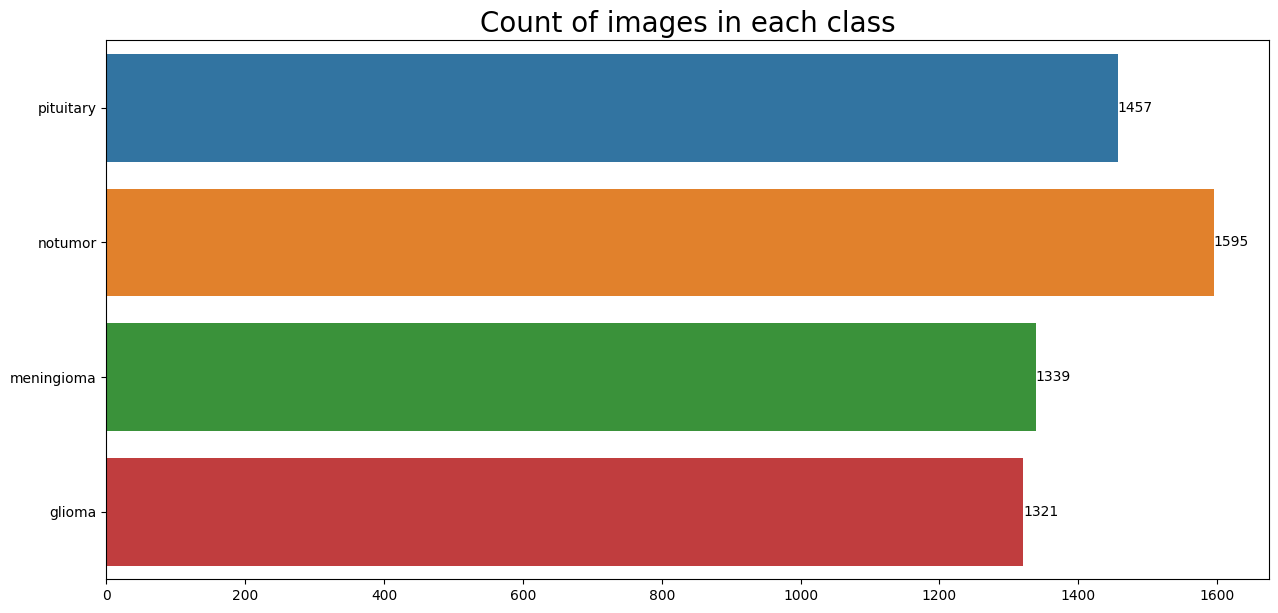

In [13]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df , y=tr_df['Class'])

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

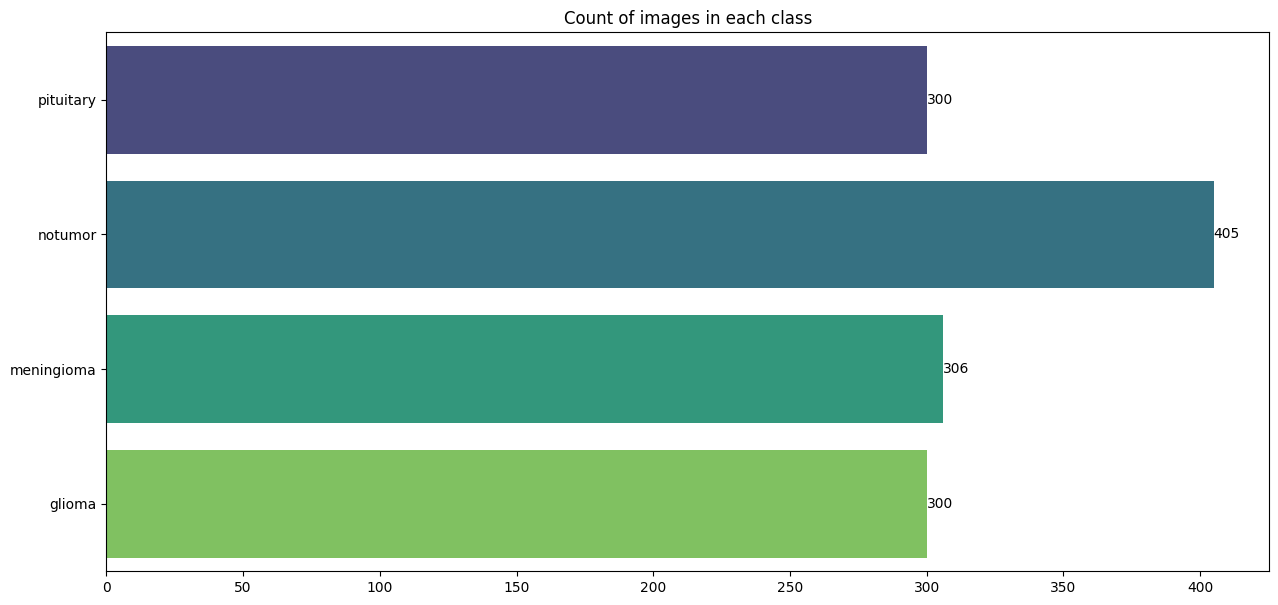

In [14]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(y=ts_df['Class'], palette='viridis')

ax.set(xlabel='', ylabel='', title='Count of images in each class')
ax.bar_label(ax.containers[0])

plt.show()

In [15]:
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, random_state=20, stratify=ts_df['Class'])

In [16]:
valid_df

,Class Path,Class
1297,/kaggle/input/brain-tumor-mri-dataset/Testing/...,glioma
723,/kaggle/input/brain-tumor-mri-dataset/Testing/...,meningioma
61,/kaggle/input/brain-tumor-mri-dataset/Testing/...,pituitary
778,/kaggle/input/brain-tumor-mri-dataset/Testing/...,meningioma
1120,/kaggle/input/brain-tumor-mri-dataset/Testing/...,glioma
...,...,...
1070,/kaggle/input/brain-tumor-mri-dataset/Testing/...,glioma
554,/kaggle/input/brain-tumor-mri-dataset/Testing/...,notumor
1284,/kaggle/input/brain-tumor-mri-dataset/Testing/...,glioma
899,/kaggle/input/brain-tumor-mri-dataset/Testing/...,meningioma


In [17]:
batch_size = 32
img_size = (299, 299)

_gen = ImageDataGenerator(rescale=1/255,brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)


tr_gen = _gen.flow_from_dataframe(tr_df, x_col='Class Path',
                                  y_col='Class', batch_size=batch_size,
                                  target_size=img_size)

valid_gen = _gen.flow_from_dataframe(valid_df, x_col='Class Path',
                                     y_col='Class', batch_size=batch_size,
                                     target_size=img_size)

ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col='Class Path',
                                  y_col='Class', batch_size=16,
                                  target_size=img_size, shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


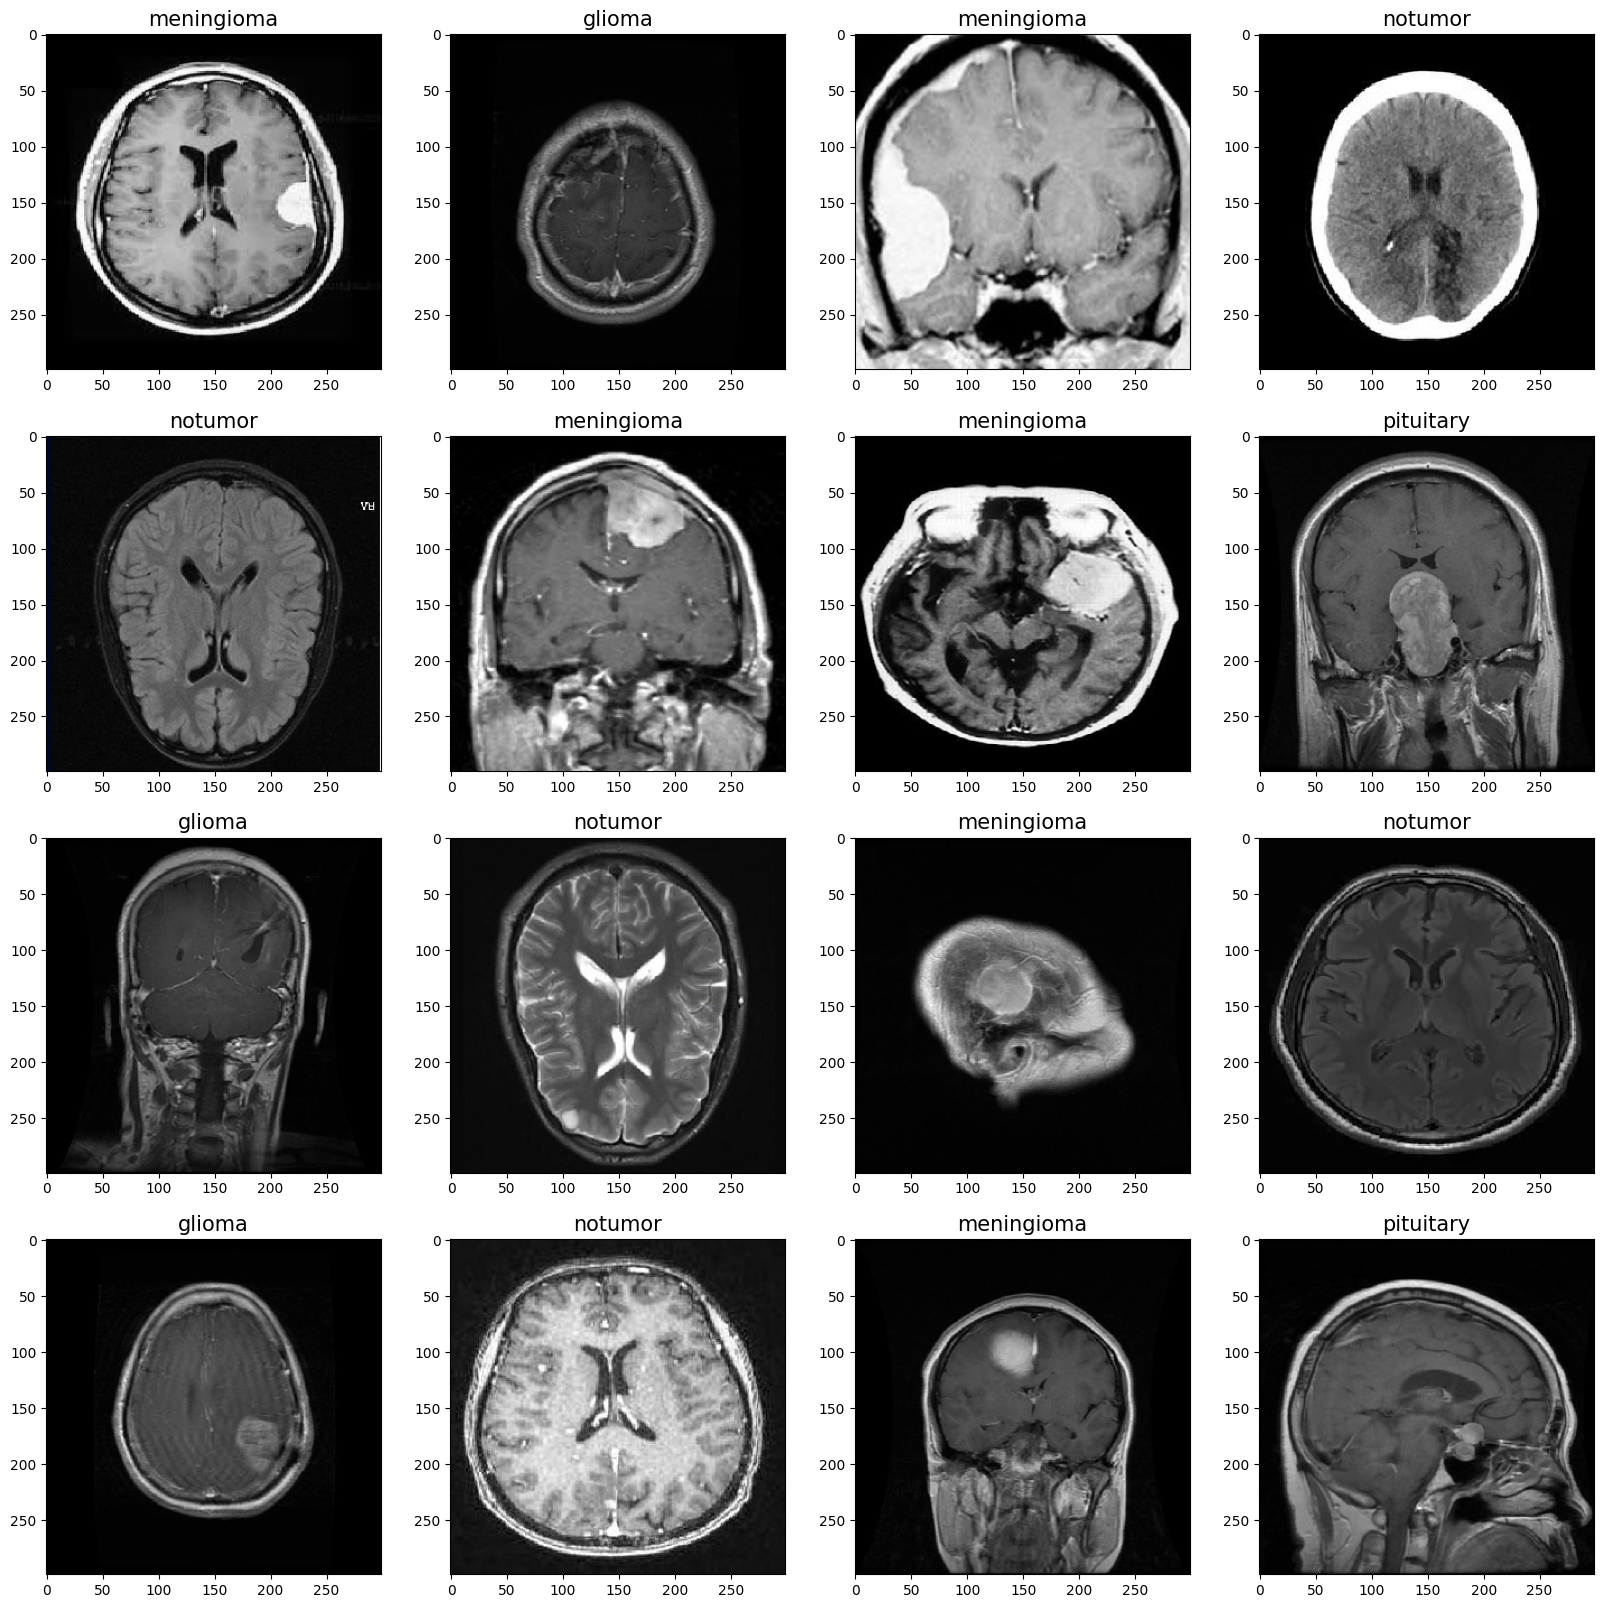

In [18]:
class_dict = tr_gen.class_indices
classes = list(class_dict.keys())
images, labels = next(ts_gen)

plt.figure(figsize=(20, 20))

for i, (image, label) in enumerate(zip(images, labels)):
    plt.subplot(4,4, i + 1)
    plt.imshow(image)
    class_name = classes[np.argmax(label)]
    plt.title(class_name, color='k', fontsize=15)

plt.show()

# 3. Building Deep Learning Model

## 3.1 XCeption Model Training and Evaluation

In [19]:
img_shape=(299,299,3)
xception = Xception(include_top= False, weights= "imagenet",input_shape= img_shape, pooling= 'max')

xception_model = Sequential([xception,
                    Flatten(),
                    Dropout(rate= 0.3),
                    Dense(128, activation= 'relu'),
                    Dropout(rate= 0.25),
                    Dense(4, activation= 'softmax')
                   ])

xception_model.compile(Adamax(learning_rate= 0.001),loss= 'categorical_crossentropy',metrics= ['accuracy',Precision(),Recall()])
xception_model.summary()

83683744/83683744 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                         

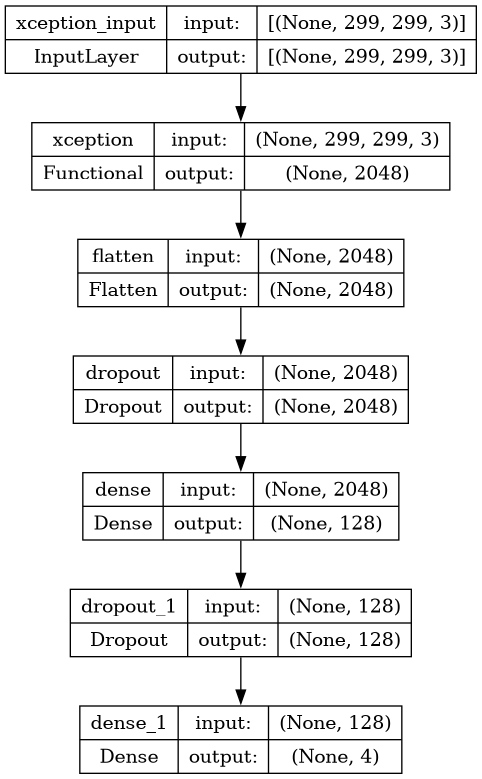

In [20]:
tf.keras.utils.plot_model(xception_model, show_shapes=True)

In [21]:
xception_hist = xception_model.fit(tr_gen,epochs=10,validation_data=valid_gen,shuffle= False)

Epoch 1/10


I0000 00:00:1708521709.136795     124 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


179/179 [==============================] - 129s 542ms/step - loss: 0.3790 - accuracy: 0.8697 - precision: 0.9141 - recall: 0.8181 - val_loss: 0.1517 - val_accuracy: 0.9435 - val_precision: 0.9493 - val_recall: 0.9435
Epoch 2/10
179/179 [==============================] - 87s 486ms/step - loss: 0.0704 - accuracy: 0.9764 - precision: 0.9781 - recall: 0.9753 - val_loss: 0.0790 - val_accuracy: 0.9725 - val_precision: 0.9740 - val_recall: 0.9710
Epoch 3/10
179/179 [==============================] - 87s 486ms/step - loss: 0.0297 - accuracy: 0.9909 - precision: 0.9914 - recall: 0.9904 - val_loss: 0.0421 - val_accuracy: 0.9847 - val_precision: 0.9847 - val_recall: 0.9847
Epoch 4/10
179/179 [==============================] - 87s 486ms/step - loss: 0.0203 - accuracy: 0.9947 - precision: 0.9949 - recall: 0.9944 - val_loss: 0.0264 - val_accuracy: 0.9893 - val_precision: 0.9908 - val_recall: 0.9893
Epoch 5/10
179/179 [==============================] - 87s 486ms/step - loss: 0.0088 - accuracy: 0.9974

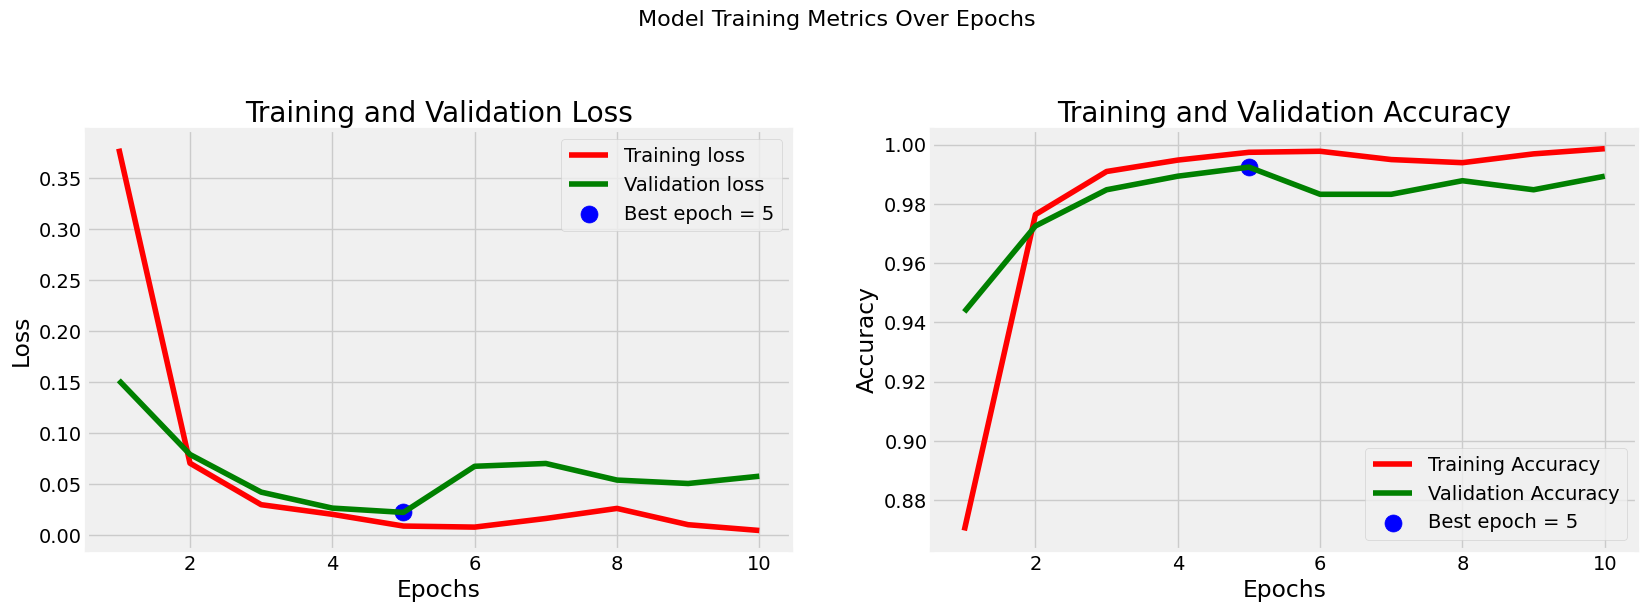

In [22]:
tr_acc = xception_hist.history['accuracy']
tr_loss = xception_hist.history['loss']
val_acc = xception_hist.history['val_accuracy']
val_loss = xception_hist.history['val_loss']

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]


Epochs = [i + 1 for i in range(len(tr_acc))]
loss_label = f'Best epoch = {str(index_loss + 1)}'
acc_label = f'Best epoch = {str(index_acc + 1)}'


plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')


plt.subplot(2, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label='Training loss')
plt.plot(Epochs, val_loss, 'g', label='Validation loss')
plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label='Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

In [23]:
train_score = xception_model.evaluate(tr_gen, verbose=1)
valid_score = xception_model.evaluate(valid_gen, verbose=1)
test_score = xception_model.evaluate(ts_gen, verbose=1)

print(f"Train Loss: {train_score[0]:.4f}")
print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print('-' * 20)
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"Validation Accuracy: {valid_score[1]*100:.2f}%")
print('-' * 20)
print(f"Test Loss: {test_score[0]:.4f}")
print(f"Test Accuracy: {test_score[1]*100:.2f}%")

41/41 [==============================] - 4s 104ms/step - loss: 0.0329 - accuracy: 0.9924 - precision: 0.9924 - recall: 0.9924
Train Loss: 0.0023
Train Accuracy: 99.88%
--------------------
Validation Loss: 0.0609
Validation Accuracy: 98.78%
--------------------
Test Loss: 0.0329
Test Accuracy: 99.24%


In [42]:
y_pred_xception = np.argmax(xception_model.predict(ts_gen), axis=1)

# Calculate metrics
acc_xception = accuracy_score(ts_gen.classes, y_pred_xception)
prec_xception = precision_score(ts_gen.classes, y_pred_xception, average='weighted')
recall_xception = recall_score(ts_gen.classes, y_pred_xception, average='weighted')
f1_xception = f1_score(ts_gen.classes, y_pred_xception, average='weighted')

# Print metrics
print("Xception Model Metrics:")
print(f"Accuracy: {acc_xception}")
print(f"Precision: {prec_xception}")
print(f"Recall: {recall_xception}")
print(f"F1 Score: {f1_xception}")

41/41 [==============================] - 3s 69ms/step
Xception Model Metrics:
Accuracy: 0.9923780487804879
Precision: 0.9923972401257977
Recall: 0.9923780487804879
F1 Score: 0.9923725329775179


In [45]:
xception_results = pd.DataFrame({
    'Model': ['Xception'],
    'Accuracy': [acc_xception],
    'Precision': [prec_xception],
    'Recall': [recall_xception],
    'F1 Score': [f1_xception]
})
xception_results

,Model,Accuracy,Precision,Recall,F1 Score
0,Xception,0.992378,0.992397,0.992378,0.992373


## 3.2 Resnet-50 Model Training and Evaluation

In [24]:
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=img_shape)

resnet_model = Sequential([
    resnet,
    Flatten(),
    Dropout(rate=0.3),
    Dense(128, activation='relu'),
    Dropout(rate=0.25),
    Dense(4, activation='softmax')
])

resnet_model.compile(optimizer=Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])
resnet_model.summary()

94765736/94765736 [==============================] - 0s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 10, 10, 2048)      23587712  
                                                                 
 flatten_1 (Flatten)         (None, 204800)            0         
                                                                 
 dropout_2 (Dropout)         (None, 204800)            0         
                                                                 
 dense_2 (Dense)             (None, 128)               26214528  
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 516       
                                                       

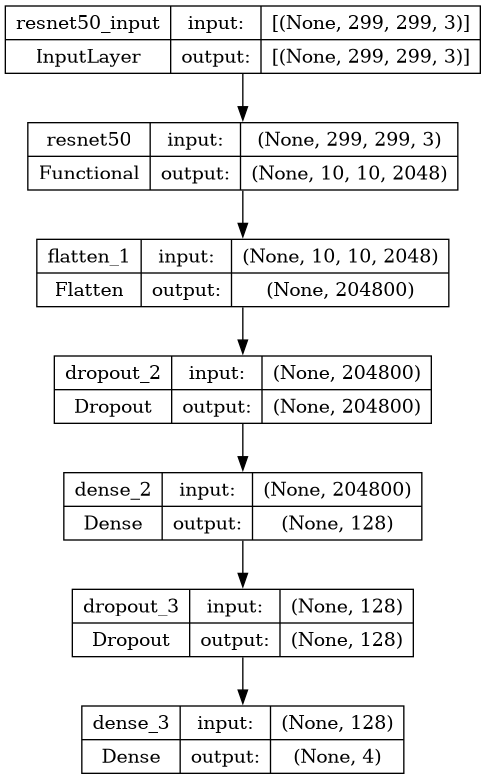

In [25]:
tf.keras.utils.plot_model(resnet_model, show_shapes=True)

In [26]:
resnet_hist = resnet_model.fit(tr_gen,epochs=10,validation_data=valid_gen,shuffle= False)

Epoch 1/10
179/179 [==============================] - 102s 387ms/step - loss: 1.1287 - accuracy: 0.8703 - precision_1: 0.8899 - recall_1: 0.8489 - val_loss: 4.2998 - val_accuracy: 0.3084 - val_precision_1: 0.3084 - val_recall_1: 0.3084
Epoch 2/10
179/179 [==============================] - 63s 350ms/step - loss: 0.1543 - accuracy: 0.9501 - precision_1: 0.9541 - recall_1: 0.9468 - val_loss: 3.7271 - val_accuracy: 0.3084 - val_precision_1: 0.3084 - val_recall_1: 0.3084
Epoch 3/10
179/179 [==============================] - 63s 350ms/step - loss: 0.0514 - accuracy: 0.9837 - precision_1: 0.9846 - recall_1: 0.9827 - val_loss: 3.0208 - val_accuracy: 0.3038 - val_precision_1: 0.3038 - val_recall_1: 0.3038
Epoch 4/10
179/179 [==============================] - 63s 351ms/step - loss: 0.1464 - accuracy: 0.9925 - precision_1: 0.9926 - recall_1: 0.9921 - val_loss: 2.2436 - val_accuracy: 0.4305 - val_precision_1: 0.4542 - val_recall_1: 0.4015
Epoch 5/10
179/179 [==============================] - 63s 3

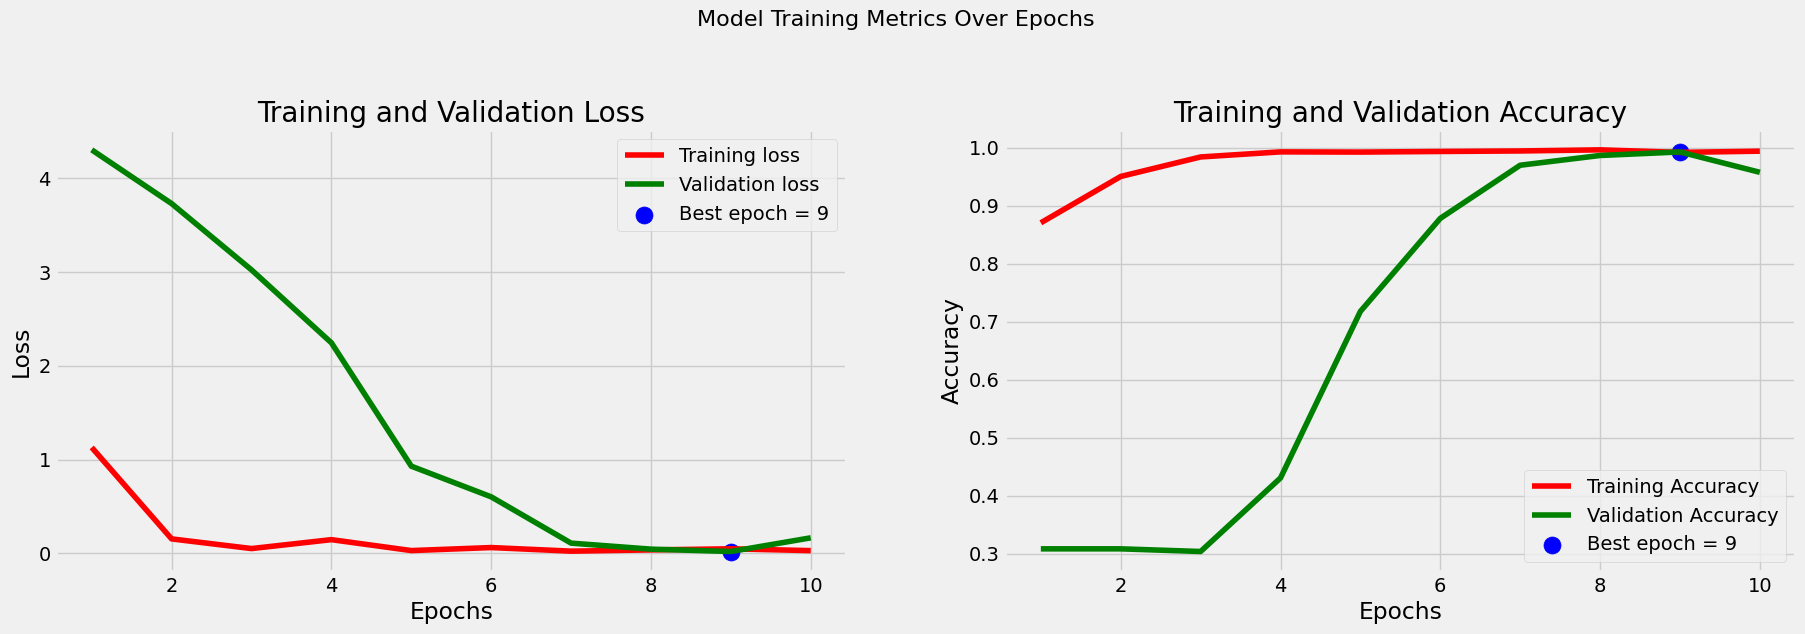

In [27]:
tr_acc = resnet_hist.history['accuracy']
tr_loss = resnet_hist.history['loss']

val_acc = resnet_hist.history['val_accuracy']
val_loss = resnet_hist.history['val_loss']


index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]


Epochs = [i + 1 for i in range(len(tr_acc))]
loss_label = f'Best epoch = {str(index_loss + 1)}'
acc_label = f'Best epoch = {str(index_acc + 1)}'



plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')


plt.subplot(2, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label='Training loss')
plt.plot(Epochs, val_loss, 'g', label='Validation loss')
plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label='Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

In [28]:
train_score = resnet_model.evaluate(tr_gen, verbose=1)
valid_score = resnet_model.evaluate(valid_gen, verbose=1)
test_score  = resnet_model.evaluate(ts_gen, verbose=1)

print(f"Train Loss: {train_score[0]:.4f}")
print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print('-' * 20)
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"Validation Accuracy: {valid_score[1]*100:.2f}%")
print('-' * 20)
print(f"Test Loss: {test_score[0]:.4f}")
print(f"Test Accuracy: {test_score[1]*100:.2f}%")

41/41 [==============================] - 3s 68ms/step - loss: 0.1001 - accuracy: 0.9695 - precision_1: 0.9694 - recall_1: 0.9665
Train Loss: 0.0503
Train Accuracy: 98.67%
--------------------
Validation Loss: 0.1848
Validation Accuracy: 95.88%
--------------------
Test Loss: 0.1001
Test Accuracy: 96.95%


In [48]:
y_pred_resnet = np.argmax(resnet_model.predict(ts_gen), axis=1)

# Calculate metrics
acc_resnet = accuracy_score(ts_gen.classes, y_pred_resnet)
prec_resnet = precision_score(ts_gen.classes, y_pred_resnet, average='weighted')
recall_resnet = recall_score(ts_gen.classes, y_pred_resnet, average='weighted')
f1_resnet = f1_score(ts_gen.classes, y_pred_resnet, average='weighted')

# Print metrics
print("ResNet-50 Model Metrics:")
print(f"Accuracy: {acc_resnet}")
print(f"Precision: {prec_resnet}")
print(f"Recall: {recall_resnet}")
print(f"F1 Score: {f1_resnet}")

41/41 [==============================] - 2s 56ms/step
ResNet-50 Model Metrics:
Accuracy: 0.9695121951219512
Precision: 0.9725684481109517
Recall: 0.9695121951219512
F1 Score: 0.9697180185787373


In [50]:
resnet_results = pd.DataFrame({
    'Model': ['ResNet-50'],
    'Accuracy': [acc_resnet],
    'Precision': [prec_resnet],
    'Recall': [recall_resnet],
    'F1 Score': [f1_resnet]
})
resnet_results

,Model,Accuracy,Precision,Recall,F1 Score
0,ResNet-50,0.969512,0.972568,0.969512,0.969718


## 3.3 InceptionV3 Model Training and Evaluation

In [29]:
inception = InceptionV3(weights='imagenet', include_top=False, input_shape=img_shape)

inception_model = Sequential([
    inception,
    Flatten(),
    Dropout(rate=0.3),
    Dense(128, activation='relu'),
    Dropout(rate=0.25),
    Dense(4, activation='softmax')
])

inception_model.compile(optimizer=Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])
inception_model.summary()

87910968/87910968 [==============================] - 1s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 flatten_2 (Flatten)         (None, 131072)            0         
                                                                 
 dropout_4 (Dropout)         (None, 131072)            0         
                                                                 
 dense_4 (Dense)             (None, 128)               16777344  
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 4)                 516       
                                                       

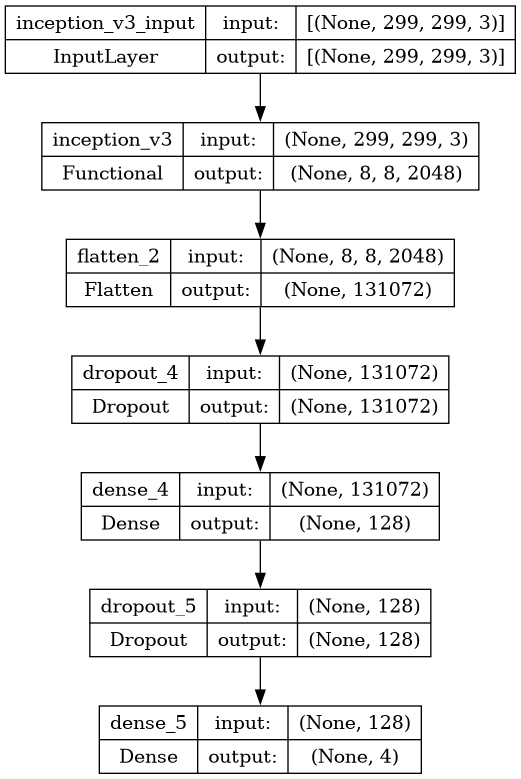

In [30]:
tf.keras.utils.plot_model(inception_model, show_shapes=True)

In [31]:
incepton_hist = inception_model.fit(tr_gen,epochs=10,validation_data=valid_gen,shuffle= False)

Epoch 1/10
179/179 [==============================] - 93s 319ms/step - loss: 1.0201 - accuracy: 0.8619 - precision_2: 0.8899 - recall_2: 0.8319 - val_loss: 0.6313 - val_accuracy: 0.7985 - val_precision_2: 0.8022 - val_recall_2: 0.7924
Epoch 2/10
179/179 [==============================] - 48s 268ms/step - loss: 0.1181 - accuracy: 0.9634 - precision_2: 0.9680 - recall_2: 0.9578 - val_loss: 0.1466 - val_accuracy: 0.9511 - val_precision_2: 0.9582 - val_recall_2: 0.9450
Epoch 3/10
179/179 [==============================] - 48s 269ms/step - loss: 0.0786 - accuracy: 0.9764 - precision_2: 0.9790 - recall_2: 0.9736 - val_loss: 0.4639 - val_accuracy: 0.8626 - val_precision_2: 0.8677 - val_recall_2: 0.8611
Epoch 4/10
179/179 [==============================] - 48s 268ms/step - loss: 0.0534 - accuracy: 0.9849 - precision_2: 0.9866 - recall_2: 0.9832 - val_loss: 0.0825 - val_accuracy: 0.9725 - val_precision_2: 0.9754 - val_recall_2: 0.9679
Epoch 5/10
179/179 [==============================] - 48s 26

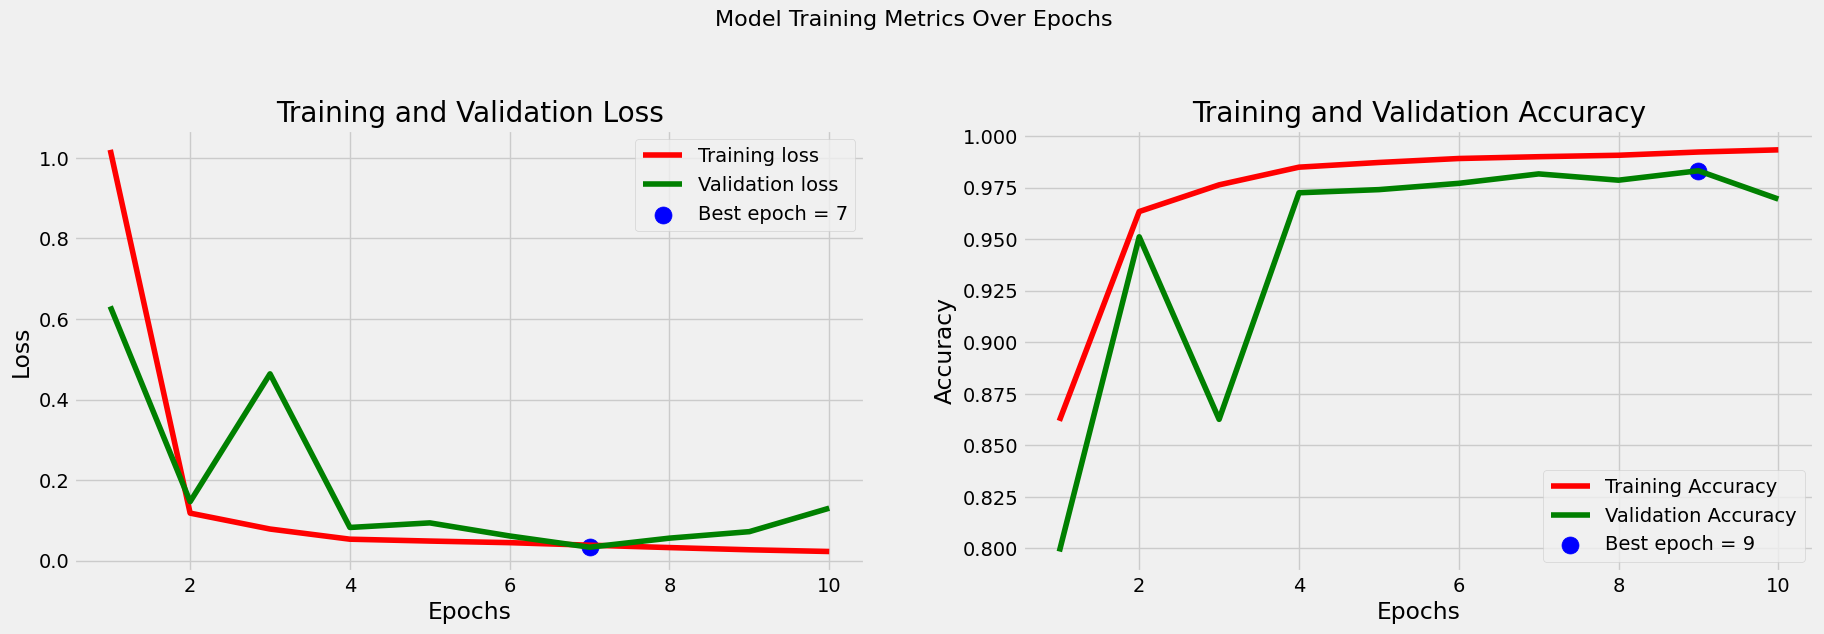

In [32]:
tr_acc = incepton_hist.history['accuracy']
tr_loss = incepton_hist.history['loss']

val_acc = incepton_hist.history['val_accuracy']
val_loss = incepton_hist.history['val_loss']


index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]


Epochs = [i + 1 for i in range(len(tr_acc))]
loss_label = f'Best epoch = {str(index_loss + 1)}'
acc_label = f'Best epoch = {str(index_acc + 1)}'


plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')


plt.subplot(2, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label='Training loss')
plt.plot(Epochs, val_loss, 'g', label='Validation loss')
plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label='Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

In [33]:
train_score = inception_model.evaluate(tr_gen, verbose=1)
valid_score = inception_model.evaluate(valid_gen, verbose=1)
test_score  = inception_model.evaluate(ts_gen, verbose=1)

print(f"Train Loss: {train_score[0]:.4f}")
print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print('-' * 20)
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"Validation Accuracy: {valid_score[1]*100:.2f}%")
print('-' * 20)
print(f"Test Loss: {test_score[0]:.4f}")
print(f"Test Accuracy: {test_score[1]*100:.2f}%")

41/41 [==============================] - 3s 67ms/step - loss: 0.2219 - accuracy: 0.9466 - precision_2: 0.9480 - recall_2: 0.9451
Train Loss: 0.1766
Train Accuracy: 96.08%
--------------------
Validation Loss: 0.1444
Validation Accuracy: 97.10%
--------------------
Test Loss: 0.2219
Test Accuracy: 94.66%


In [51]:
y_pred_inception = np.argmax(inception_model.predict(ts_gen), axis=1)

# Calculate metrics
acc_inception = accuracy_score(ts_gen.classes, y_pred_inception)
prec_inception = precision_score(ts_gen.classes, y_pred_inception, average='weighted')
recall_inception = recall_score(ts_gen.classes, y_pred_inception, average='weighted')
f1_inception = f1_score(ts_gen.classes, y_pred_inception, average='weighted')

# Print metrics
print("InceptionV3 Model Metrics:")
print(f"Accuracy: {acc_inception}")
print(f"Precision: {prec_inception}")
print(f"Recall: {recall_inception}")
print(f"F1 Score: {f1_inception}")

41/41 [==============================] - 3s 54ms/step
InceptionV3 Model Metrics:
Accuracy: 0.9466463414634146
Precision: 0.9534594108647818
Recall: 0.9466463414634146
F1 Score: 0.9462860067544354


In [53]:
inception_results = pd.DataFrame({
    'Model': ['InceptionV3'],
    'Accuracy': [acc_inception],
    'Precision': [prec_inception],
    'Recall': [recall_inception],
    'F1 Score': [f1_inception]
})
inception_results

,Model,Accuracy,Precision,Recall,F1 Score
0,InceptionV3,0.946646,0.953459,0.946646,0.946286


## 3.4 EfficentNet-B0 Model Training and Evaluation

In [34]:
efficent = EfficientNetB0(weights='imagenet', include_top=False, input_shape=img_shape)

efficent_model = Sequential([
    efficent,
    Flatten(),
    Dropout(rate=0.3),
    Dense(128, activation='relu'),
    Dropout(rate=0.25),
    Dense(4, activation='softmax')
])

efficent_model.compile(optimizer=Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])
efficent_model.summary()

16705208/16705208 [==============================] - 0s 0us/step
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 10, 10, 1280)      4049571   
 )                                                               
                                                                 
 flatten_3 (Flatten)         (None, 128000)            0         
                                                                 
 dropout_6 (Dropout)         (None, 128000)            0         
                                                                 
 dense_6 (Dense)             (None, 128)               16384128  
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 4)                 

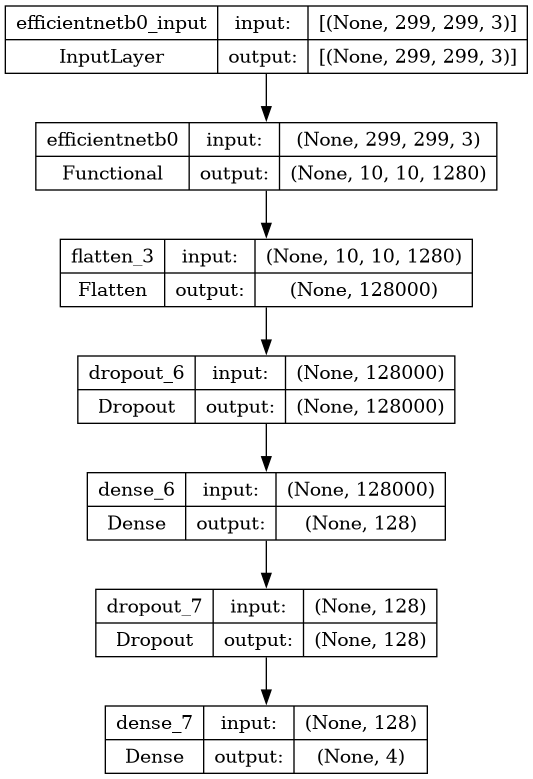

In [35]:
tf.keras.utils.plot_model(efficent_model, show_shapes=True)

In [36]:
efficent_hist = efficent_model.fit(tr_gen,epochs=10,validation_data=valid_gen,shuffle= False)

Epoch 1/10


2024-02-21 13:59:17.149154: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_3/efficientnetb0/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


179/179 [==============================] - 106s 411ms/step - loss: 0.5727 - accuracy: 0.8384 - precision_3: 0.8643 - recall_3: 0.8174 - val_loss: 1.4120 - val_accuracy: 0.2916 - val_precision_3: 1.0000 - val_recall_3: 0.0015
Epoch 2/10
179/179 [==============================] - 70s 389ms/step - loss: 0.1577 - accuracy: 0.9428 - precision_3: 0.9479 - recall_3: 0.9363 - val_loss: 1.8449 - val_accuracy: 0.3649 - val_precision_3: 0.4067 - val_recall_3: 0.3496
Epoch 3/10
179/179 [==============================] - 70s 392ms/step - loss: 0.1027 - accuracy: 0.9641 - precision_3: 0.9681 - recall_3: 0.9613 - val_loss: 1.0802 - val_accuracy: 0.5359 - val_precision_3: 0.6293 - val_recall_3: 0.3084
Epoch 4/10
179/179 [==============================] - 70s 392ms/step - loss: 0.0578 - accuracy: 0.9793 - precision_3: 0.9809 - recall_3: 0.9778 - val_loss: 1513.7565 - val_accuracy: 0.2351 - val_precision_3: 0.2351 - val_recall_3: 0.2351
Epoch 5/10
179/179 [==============================] - 71s 393ms/ste

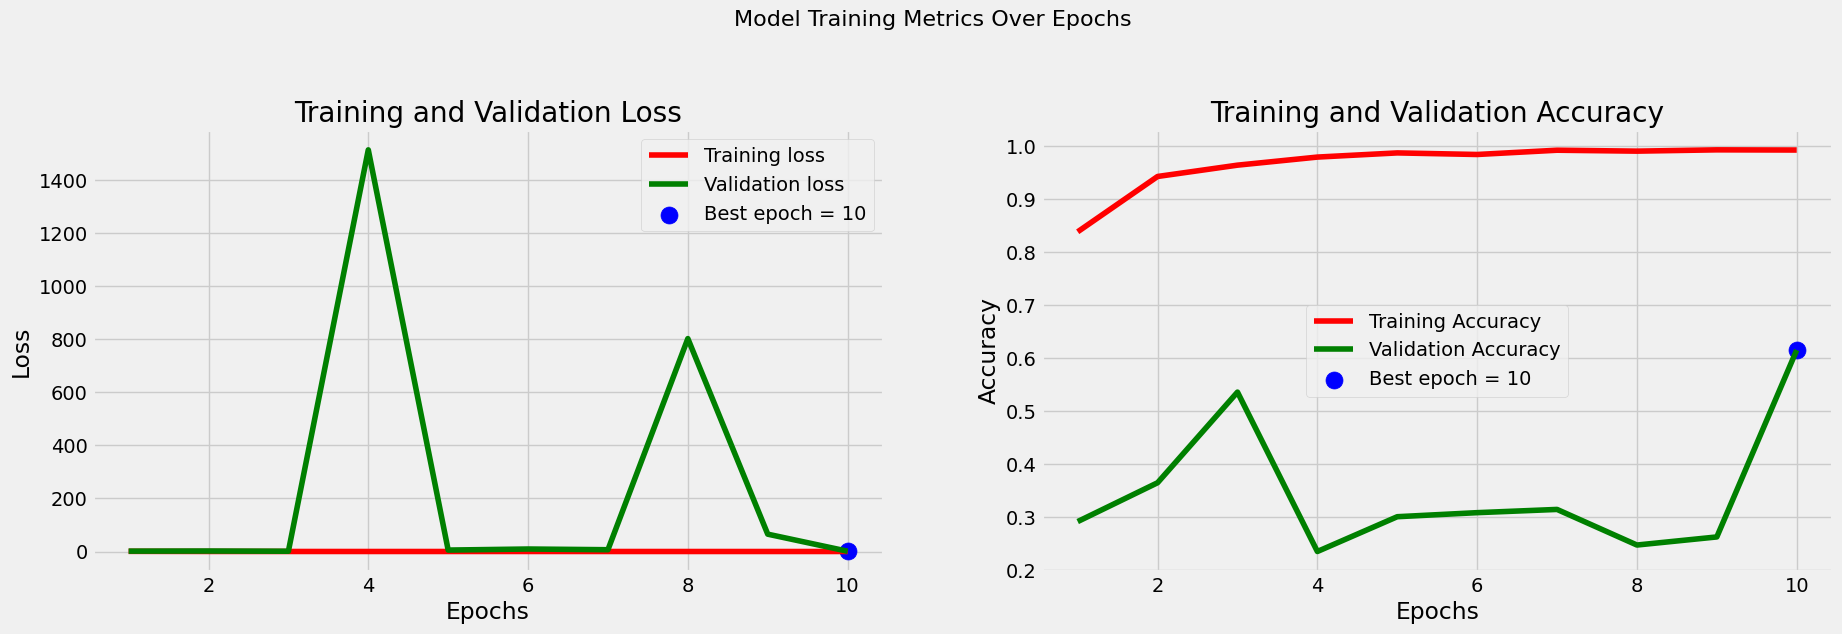

In [37]:
tr_acc = efficent_hist.history['accuracy']
tr_loss = efficent_hist.history['loss']
val_acc = efficent_hist.history['val_accuracy']
val_loss = efficent_hist.history['val_loss']


index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]


Epochs = [i + 1 for i in range(len(tr_acc))]
loss_label = f'Best epoch = {str(index_loss + 1)}'
acc_label = f'Best epoch = {str(index_acc + 1)}'



plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')


plt.subplot(2, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label='Training loss')
plt.plot(Epochs, val_loss, 'g', label='Validation loss')
plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label='Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

In [38]:
train_score = efficent_model.evaluate(tr_gen, verbose=1)
valid_score = efficent_model.evaluate(valid_gen, verbose=1)
test_score = efficent_model.evaluate(ts_gen, verbose=1)

print(f"Train Loss: {train_score[0]:.4f}")
print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print('-' * 20)
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"Validation Accuracy: {valid_score[1]*100:.2f}%")
print('-' * 20)
print(f"Test Loss: {test_score[0]:.4f}")
print(f"Test Accuracy: {test_score[1]*100:.2f}%")


41/41 [==============================] - 2s 52ms/step - loss: 1.0303 - accuracy: 0.6418 - precision_3: 0.7067 - recall_3: 0.4848
Train Loss: 0.9613
Train Accuracy: 60.64%
--------------------
Validation Loss: 1.0282
Validation Accuracy: 60.76%
--------------------
Test Loss: 1.0303
Test Accuracy: 64.18%


In [54]:
y_pred_efficent = np.argmax(efficent_model.predict(ts_gen), axis=1)

# Calculate metrics
acc_efficent = accuracy_score(ts_gen.classes, y_pred_efficent)
prec_efficent = precision_score(ts_gen.classes, y_pred_efficent, average='weighted')
recall_efficent = recall_score(ts_gen.classes, y_pred_efficent, average='weighted')
f1_efficent = f1_score(ts_gen.classes, y_pred_efficent, average='weighted')

# Print metrics
print("EfficientNet-B0 Model Metrics:")
print(f"Accuracy: {acc_efficent}")
print(f"Precision: {prec_efficent}")
print(f"Recall: {recall_efficent}")
print(f"F1 Score: {f1_efficent}")

41/41 [==============================] - 3s 49ms/step
EfficientNet-B0 Model Metrics:
Accuracy: 0.6417682926829268
Precision: 0.6627169823887851
Recall: 0.6417682926829268
F1 Score: 0.5975916718185661


In [56]:
efficent_results = pd.DataFrame({
    'Model': ['EfficientNet-B0'],
    'Accuracy': [acc_efficent],
    'Precision': [prec_efficent],
    'Recall': [recall_efficent],
    'F1 Score': [f1_efficent]
})
efficent_results

,Model,Accuracy,Precision,Recall,F1 Score
0,EfficientNet-B0,0.641768,0.662717,0.641768,0.597592


In [59]:
Results = pd.concat([xception_results, resnet_results, inception_results, efficent_results], ignore_index=True)
Results

,Model,Accuracy,Precision,Recall,F1 Score
0,Xception,0.992378,0.992397,0.992378,0.992373
1,ResNet-50,0.969512,0.972568,0.969512,0.969718
2,InceptionV3,0.946646,0.953459,0.946646,0.946286
3,EfficientNet-B0,0.641768,0.662717,0.641768,0.597592


In [60]:
preds = xception_model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

41/41 [==============================] - 3s 70ms/step


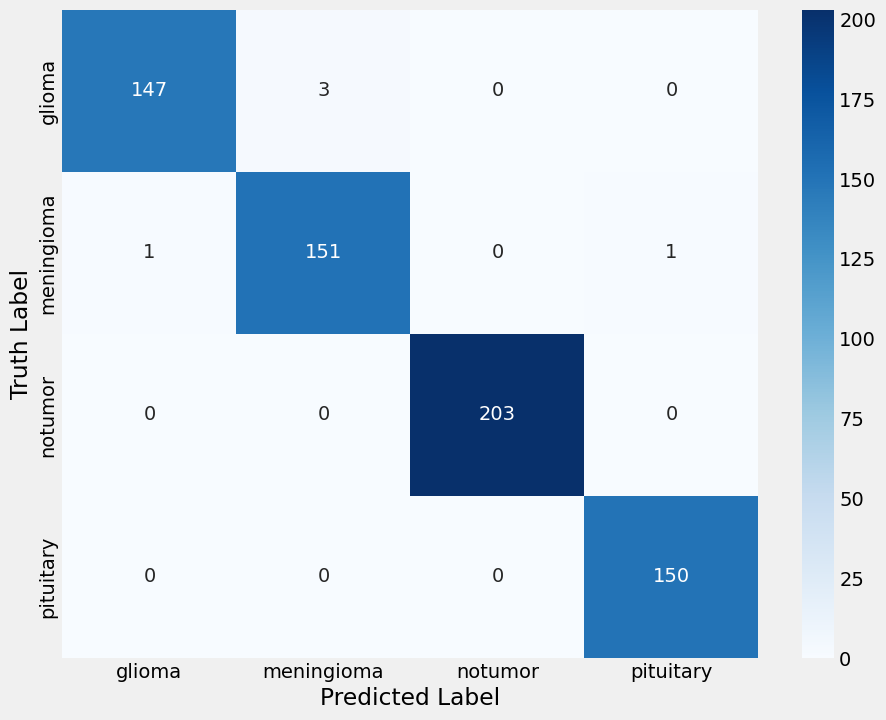

In [61]:
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('Truth Label')
plt.show()

In [62]:
clr = classification_report(ts_gen.classes, y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       150
           1       0.98      0.99      0.98       153
           2       1.00      1.00      1.00       203
           3       0.99      1.00      1.00       150

    accuracy                           0.99       656
   macro avg       0.99      0.99      0.99       656
weighted avg       0.99      0.99      0.99       656



## 5.2 Testing

In [65]:
def predict(img_path):
    import numpy as np
    import matplotlib.pyplot as plt
    from PIL import Image
    label = list(class_dict.keys())
    plt.figure(figsize=(12, 12))
    img = Image.open(img_path)
    resized_img = img.resize((299, 299))
    img = np.asarray(resized_img)
    img = np.expand_dims(img, axis=0)
    img = img / 255
    predictions = xception_model.predict(img)
    probs = list(predictions[0])
    labels = label
    plt.subplot(2, 1, 1)
    plt.imshow(resized_img)
    plt.subplot(2, 1, 2)
    bars = plt.barh(labels, probs)
    plt.xlabel('Probability', fontsize=15)
    ax = plt.gca()
    ax.bar_label(bars, fmt = '%.2f')
    plt.show()

1/1 [==============================] - 1s 1s/step


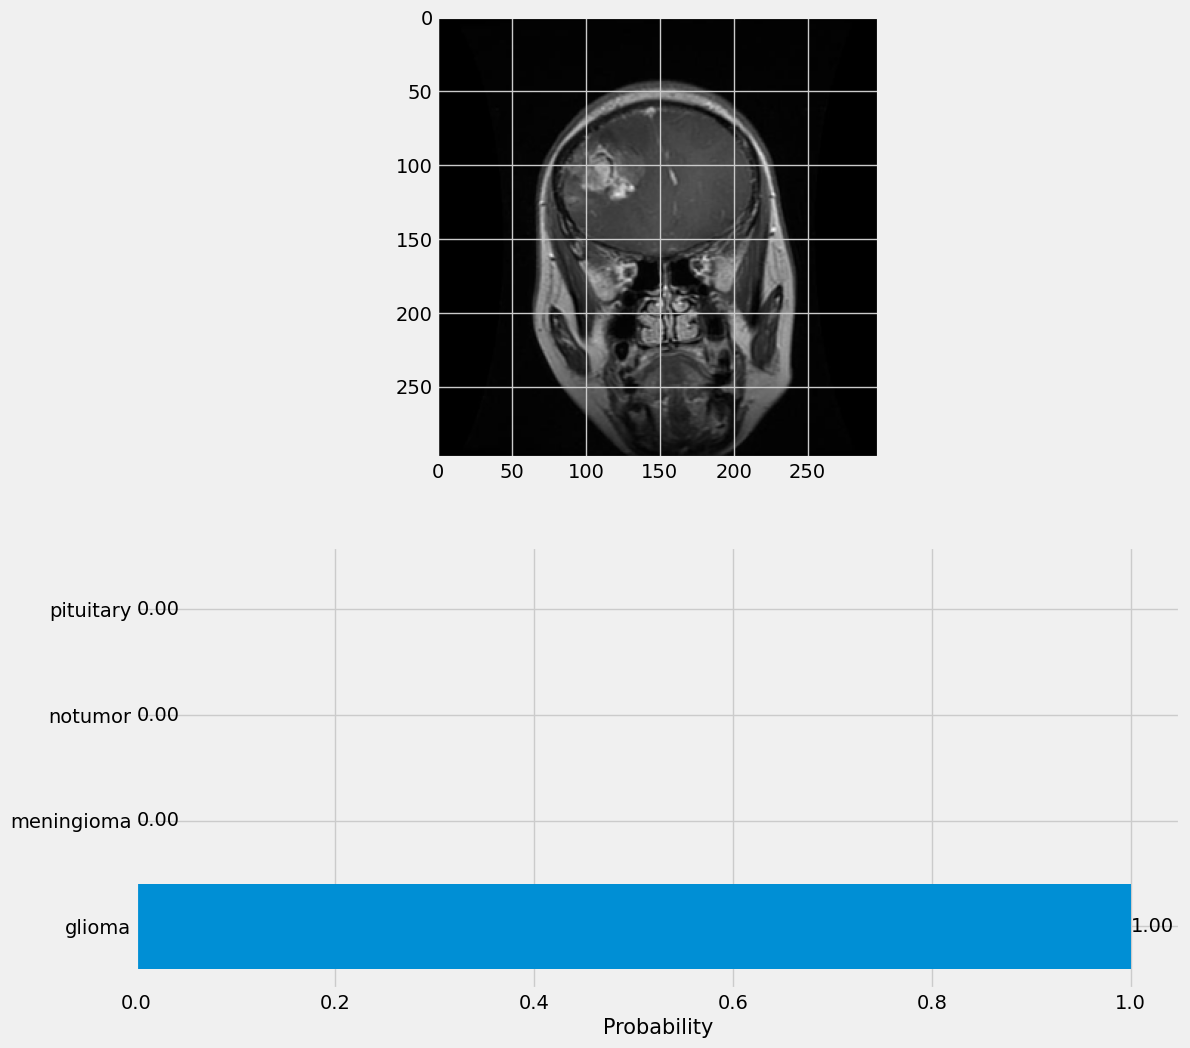

In [66]:
predict('/kaggle/input/brain-tumor-mri-dataset/Training/glioma/Tr-glTr_0000.jpg')